# Stack Overflow Survey Trends
Understanding developer trends in Stack Overflow survey data

### Task 1: Explore Data
The initial step is to conduct exploratory data analysis (EDA) to gain a structured understanding of the dataset and identify any patterns of missingness across variables. This process provides a high-level overview of the available fields, their data types, and overall completeness.

To begin, the dataset will be loaded into a pandas DataFrame, which enables efficient inspection, manipulation, and statistical summarization of the data prior to deeper analysis.

In [40]:
#import the necessary libraries for the task
import pandas as pd

#load the data into the DataFrame
df = pd.read_csv('C:\\Users\\IsseI\\OneDrive\\Documents\\Python Projects\\codeacademy\\developer_dataset.csv\\developer_dataset.csv')

#print out all columns
print(df.columns)

Index(['RespondentID', 'Year', 'Country', 'Employment', 'UndergradMajor',
       'DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Hobbyist', 'OrgSize', 'YearsCodePro',
       'JobSeek', 'ConvertedComp', 'WorkWeekHrs', 'NEWJobHunt',
       'NEWJobHuntResearch', 'NEWLearn'],
      dtype='object')


C:\Users\IsseI\AppData\Local\Temp\ipykernel_8752\3707081843.py:5: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:\\Users\\IsseI\\OneDrive\\Documents\\Python Projects\\codeacademy\\developer_dataset.csv\\developer_dataset.csv')


The columns can be broadly categorized into three groups: identifiers (e.g., RespondentID, Year, Country), descriptive attributes (e.g., LanguageWorkedWith, DatabaseWorkedWith, UndergradMajor), and forward-looking variables that capture future intentions or aspirations (e.g., LanguageDesireNextYear, DatabaseDesireNextYear).

Because this dataset originates from a survey, item non-response is expected; not all participants answer every question. Consequently, it is important to assess data completeness at the row and column levels to understand how much usable information is available for analysis.

Using df.describe() provides summary statistics for numerical variables, including:

* The count of non-missing observations per column

* Measures of central tendency (e.g., mean)

* Minimum and maximum values

* Dispersion metrics (e.g., standard deviation)

While this function applies only to numerical columns, it remains valuable for evaluating data coverage and identifying potential gaps within quantitative fields before proceeding with deeper analysis.

In [41]:
df.describe()

,RespondentID,Year,YearsCodePro,ConvertedComp,WorkWeekHrs
count,111209.000000,111209.000000,94793.000000,9.133300e+04,51089.000000
mean,19262.039709,2018.854832,9.547045,1.251777e+05,41.051670
std,11767.011322,0.777503,7.548931,2.461218e+05,13.833929
min,1.000000,2018.000000,0.000000,0.000000e+00,1.000000
25%,9268.000000,2018.000000,4.000000,4.600000e+04,40.000000
50%,18535.000000,2019.000000,8.000000,7.900000e+04,40.000000
75%,28347.000000,2019.000000,14.000000,1.200000e+05,42.000000
max,42857.000000,2020.000000,50.000000,2.000000e+06,475.000000


Several variables exhibit substantial levels of missingness. To assess the extent of this issue systematically, we calculate the percentage of missing values for each column. This allows us to quantify the magnitude of missing data across variables and make informed decisions regarding data retention, imputation, or exclusion based on predefined thresholds.

In [42]:
# We choose the RespondentID column as our maximum amount of values
maxrows = df['RespondentID'].count()

# Using maxrows we calculate and print percentage missing data
print('% Missing Data: ')
print((1 - df.count() / maxrows) *100)

% Missing Data: 
RespondentID               0.000000
Year                       0.000000
Country                    0.000000
Employment                 1.604187
UndergradMajor            11.470295
DevType                    9.689863
LanguageWorkedWith         8.264619
LanguageDesireNextYear    13.636486
DatabaseWorkedWith        22.794918
DatabaseDesireNextYear    33.248208
PlatformWorkedWith        17.624473
PlatformDesireNextYear    23.229235
Hobbyist                  38.537349
OrgSize                   50.719816
YearsCodePro              14.761395
JobSeek                   45.547573
ConvertedComp             17.872654
WorkWeekHrs               54.060373
NEWJobHunt                82.800852
NEWJobHuntResearch        83.200101
NEWLearn                  78.215792
dtype: float64


It is evident that the variables NEWJobHunt, NEWJobHuntResearch, and NEWLearn contain the highest proportion of missing values. This is likely because these items were conditional or only relevant to a subset of respondents, meaning they were not answered universally across the sample.

Given that these variables are not central to the current analytical objective, observations missing values solely within these fields do not provide meaningful information for this stage of the study. Therefore, excluding these rows from the analysis is methodologically justified, as their removal will not compromise the validity of the core findings.

In [43]:
df.drop(['NEWJobHunt','NEWJobHuntResearch','NEWLearn'], axis=1, inplace=True)

### Task 2: Analysing Developers by Country



We now examine the distribution of developers across countries to better understand geographic representation within the dataset.

Although the proportion of missing values in the Employment and DevType columns is relatively small, this stage of the analysis requires careful consideration of missing data. Even modest levels of missingness can influence interpretation, particularly when comparing distributions across countries.

Therefore, it is essential to determine the underlying missing data mechanism. One practical approach is to assess missingness by country, allowing us to evaluate whether the pattern is random or systematically associated with specific geographic groups. This step helps ensure that any subsequent conclusions drawn from cross-country comparisons are methodologically sound.

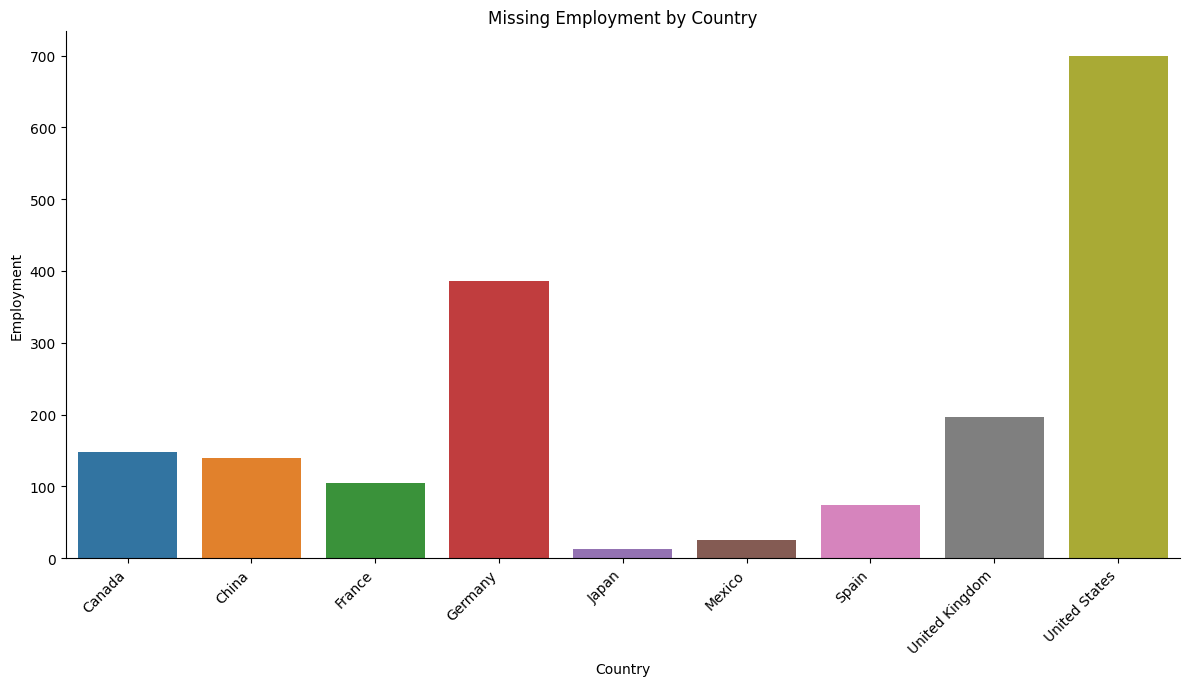

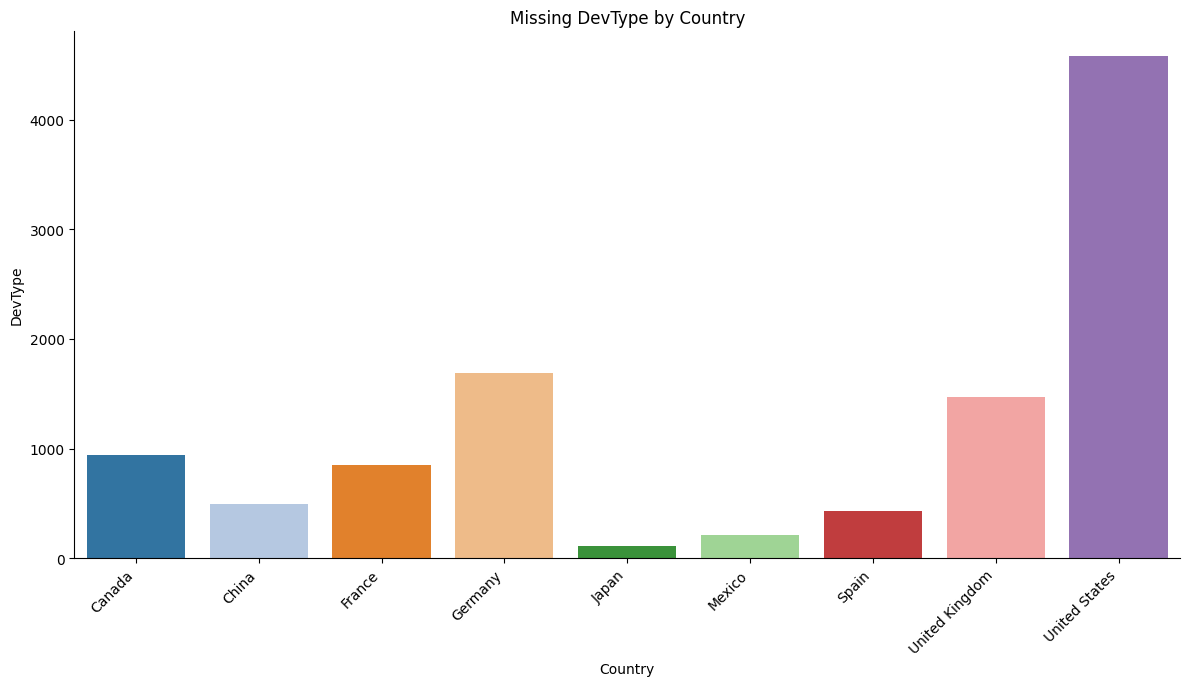

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

# count missing values by country
missingData = df[['Employment','DevType']].isnull().groupby(df['Country']).sum().reset_index()

# determine number of countries for palette sizing
n_countries = missingData.shape[0]

# choose explicit palettes sized to the data
employment_palette = sns.color_palette("tab10", n_colors=n_countries)
devtype_palette = sns.color_palette("tab20", n_colors=n_countries)

try:
    A = sns.catplot(
        data=missingData, kind="bar",
        x="Country", y="Employment",
        palette=employment_palette,
        height=6, aspect=2)
    plt.title('Missing Employment by Country')
    plt.xticks(rotation=45, ha='right')
    plt.show()
except Exception as e:
    print("Employment missing-data plot error:", e)

try:
    B = sns.catplot(
        data=missingData, kind="bar",
        x="Country", y="DevType",
        palette=devtype_palette,
        height=6, aspect=2)
    plt.title('Missing DevType by Country')
    plt.xticks(rotation=45, ha='right')
    plt.show()
except Exception as e:
    print("DevType missing-data plot error:", e)


The pattern of missing data appears consistent with a Missing Completely at Random (MCAR) mechanism. The proportion of missing values increases in line with overall country representation, with Germany and the United States exhibiting the highest absolute levels of missingness. This is likely attributable to their larger developer populations within the dataset rather than to any systematic bias related to the variables of interest.

Given this assumption of MCAR, pairwise deletion can be applied without introducing systematic distortion into the analysis. Under MCAR conditions, this approach preserves statistical validity while maximizing the use of available data across comparisons.

In [7]:
df.dropna(subset = ['Employment','DevType'],
    inplace = True,
    how = 'any')

The first step is to aggregate the data according to the major stages of the software development lifecycle. This structured grouping allows for clearer comparison across functional domains and enables a more meaningful analysis of how skills and roles are distributed within the broader development process.

* Front-end
* Back-end
* Full-stack
* Mobile Development
* Administration roles

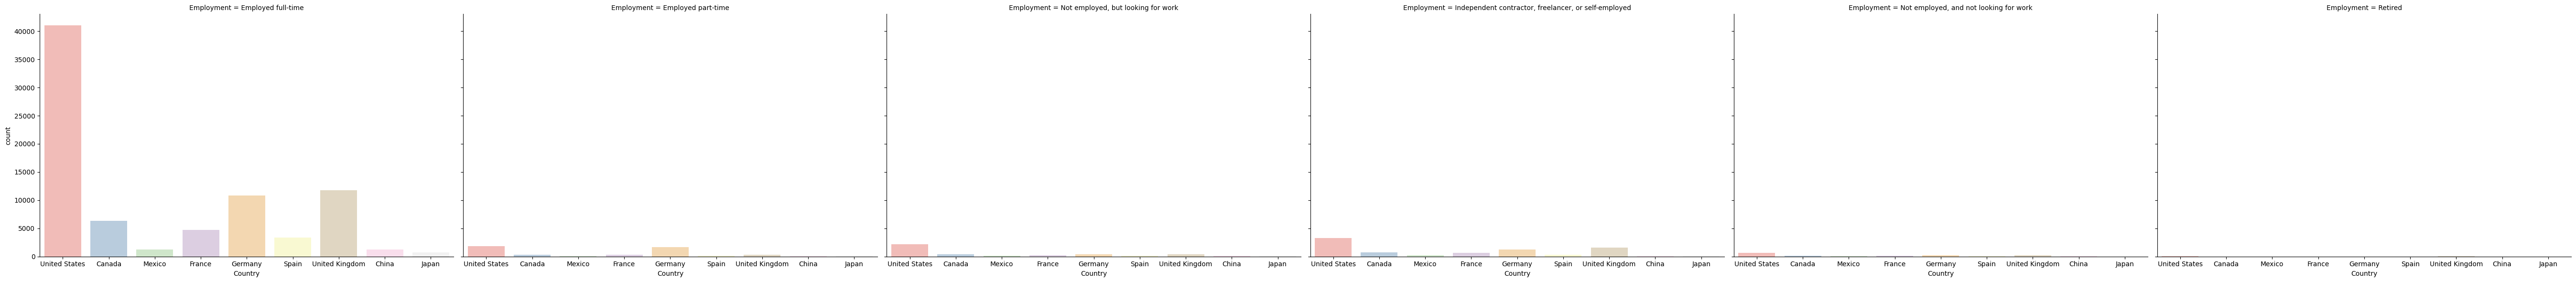

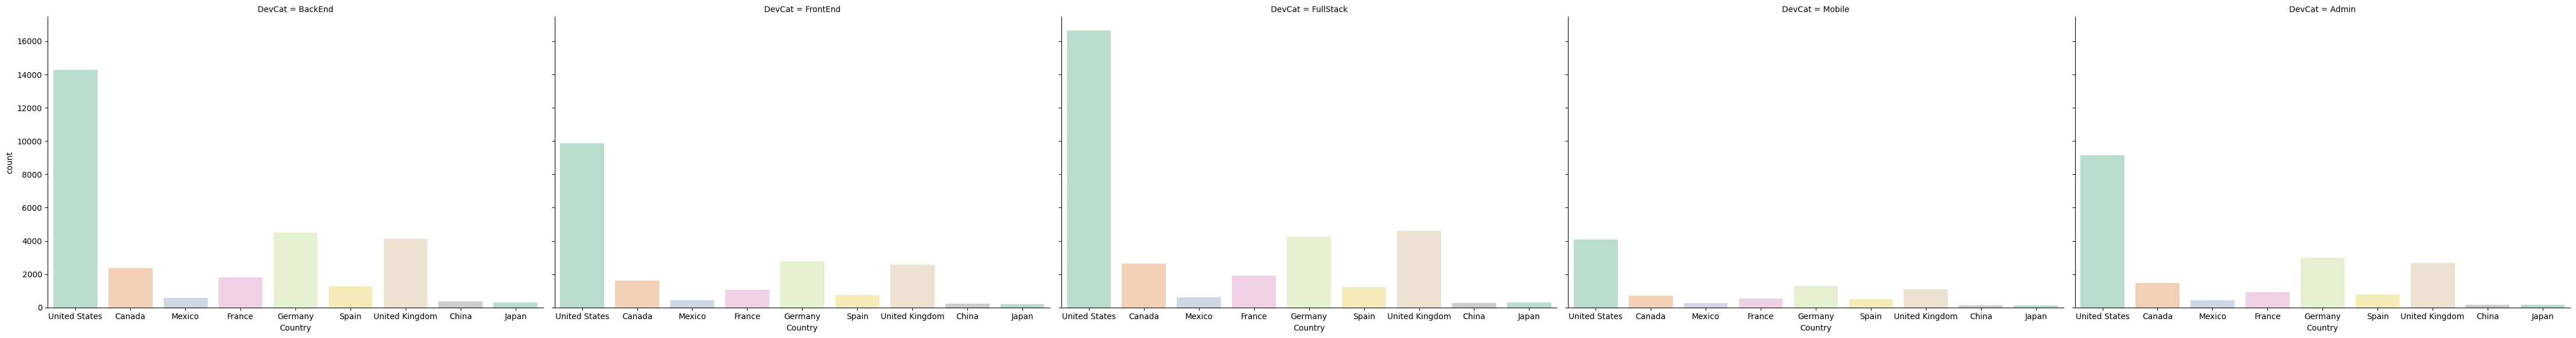

In [33]:
warnings.filterwarnings('ignore', category=FutureWarning)

try:
    empfig = sns.catplot(x="Country", col="Employment",
                    data=df, kind="count",
                    palette="Pastel1",
                    height=6, aspect=1.5)
    plt.show()
except Exception as e:
    print("Employment distribution plot error:", e)

# Focus on a few of the key developer types outlined in the Stack Overflow survey
# create a copy to avoid SettingWithCopyWarning

# create indicators

devdf = df[['Country','DevType']].copy()
devdf['BackEnd'] = devdf['DevType'].str.contains('back-end')
devdf['FrontEnd'] = devdf['DevType'].str.contains('front-end')
devdf['FullStack'] = devdf['DevType'].str.contains('full-stack')
devdf['Mobile'] = devdf['DevType'].str.contains('mobile')
devdf['Admin'] = devdf['DevType'].str.contains('administrator')

# reshape for plotting and filter only true flags
devdf = devdf.melt(id_vars=['Country'], 
    value_vars=['BackEnd','FrontEnd','FullStack','Mobile','Admin'], 
    var_name='DevCat',
    value_name='DevFlag')

devdf = devdf[devdf['DevFlag'] == True]

try:
    devFig = sns.catplot(x="Country", col="DevCat",
                    data=devdf, kind="count",
                    palette="Pastel2",
                    height=6, aspect=1.5)
    plt.show()
except Exception as e:
    print("Developer type distribution plot error:", e)


The data indicates that a significant majority of respondents are employed full-time. This suggests that the sample largely represents active professionals rather than job seekers outside the workforce. As a result, their responses provide credible insight into what currently employed developers value in potential opportunities, making the findings particularly relevant for clients seeking to attract experienced talent.

Furthermore, most developers report specialization in front-end, back-end, or full-stack development. This concentration implies that the market continues to prioritize role-based technical depth across core segments of the development lifecycle. The notable presence of full-stack developers also reflects a demand for versatility, suggesting that employers value both specialized expertise and cross-functional capability depending on organizational needs.

### Investigate developer undergraduate majors

You decide to conduct a deeper analysis of each developer type to identify trends in educational backgrounds that may have influenced their path into technology careers. Specifically, you examine year-over-year trends in respondents’ undergraduate majors.

As previously noted, approximately 10% of the UndergradMajor data is missing. What factors might explain this missing information? Did any changes occur during these three years that could account for the gap? Additionally, is the missingness random, or does it reflect a systematic issue in data collection or reporting?

To evaluate this hypothesis, you analyze the distribution of undergraduate majors across each year.

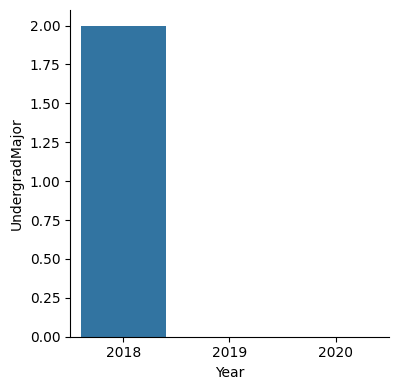

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# reload original data to capture missingness prior to any imputation/cleanup
orig = pd.read_csv('C:\Users\IsseI\OneDrive\Documents\Python Projects\codeacademy\developer_dataset.csv\developer_dataset.csv')

# compute missing counts per year on unmodified dataset
overall_missing = orig.groupby('Year')['UndergradMajor'].apply(lambda s: s.isnull().sum()).reset_index(name='MissingCount')
print(overall_missing)

try:
    sns.barplot(x='Year', y='MissingCount', data=overall_missing, palette='tab10')
    plt.title('Missing UndergradMajor by Year (original data)')
    plt.show()
except Exception as e:
    print("Missing-undergrad plot error:", e)


You observe that the 2020 UndergradMajor data is complete, indicating that all respondents reported a declared undergraduate major that year. For the purposes of this analysis, the primary interest lies in the final major selected by each participant, as this represents the educational background they ultimately brought into the job market.

To address the missing values in prior years, you apply a single imputation technique—specifically, Next Observation Carried Backward (NOCB). This approach propagates each participant’s most recent non-missing major (in this case, from 2020) backward to fill any earlier missing entries. By doing so, you preserve longitudinal consistency while minimizing data loss due to incomplete records.

In [12]:
# Sort by ID and Year so that each person's data is carried backwards correctly
df = df.sort_values(['RespondentID','Year'])

df['UndergradMajor'].bfill(axis=0, inplace=True)

From here, you analyze the major distribution for each year, using a vertical bar chart visualization:

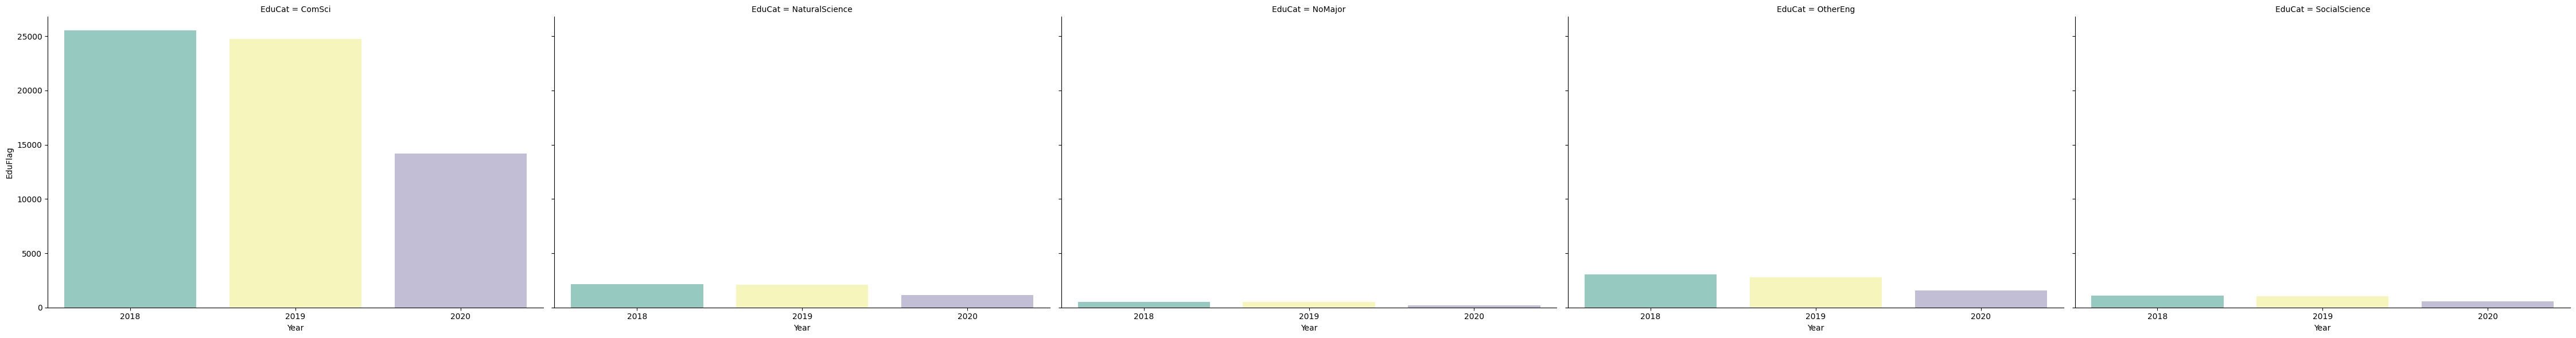

In [30]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Key major groups outlined in the Stack Overflow survey
majors = ['social science','natural science','computer science','development','another engineering','never declared']

# construct edudf safely and avoid SettingWithCopyWarning
edudf = df[['Year','UndergradMajor']].copy()
edudf.dropna(how='any', inplace=True)

# flag indicator columns
edudf['SocialScience'] = edudf['UndergradMajor'].str.contains('(?i)social science')
edudf['NaturalScience'] = edudf['UndergradMajor'].str.contains('(?i)natural science')
edudf['ComSci'] = edudf['UndergradMajor'].str.contains('(?i)computer science') | edudf['UndergradMajor'].str.contains('(?i)development')
edudf['OtherEng'] = edudf['UndergradMajor'].str.contains('(?i)another engineering')
edudf['NoMajor'] = edudf['UndergradMajor'].str.contains('(?i)never declared')

# reshape and filter for true flags
edudf = edudf.melt(id_vars=['Year'], 
    value_vars=['SocialScience','NaturalScience','ComSci','OtherEng','NoMajor'], 
    var_name='EduCat',
    value_name='EduFlag')
edudf = edudf[edudf['EduFlag']]

# aggregate counts by year and category
edudf = edudf.groupby(['Year','EduCat']).size().reset_index(name='EduFlag')

try:
    eduFig = sns.catplot(x="Year", y='EduFlag', col="EduCat",
                    data=edudf, kind="bar",
                    palette="Set3",
                    height=6, aspect=1.5);
    plt.show()
except Exception as e:
    print("Education category plot error:", e)


The analysis reveals that the majority of individuals entering the development workforce have an academic background in Computer Science. However, there is a noticeable decline in the proportion of Computer Science majors over the surveyed years.

This downward trend suggests that alternative academic pathways may be increasingly viable for individuals pursuing development roles. In other words, candidates from non–Computer Science disciplines appear to be successfully transitioning into the technology workforce.

Further investigation would be necessary to identify which majors are gaining representation and whether this shift reflects changes in employer demand, the rise of interdisciplinary programs, self-directed learning pathways, or alternative credentialing models. These findings may indicate that aspiring developers can pursue diverse educational trajectories while still achieving their desired career outcomes in technology.

### Examine the relationship between years of experience and compensation

Having examined global developer demographics—including geographic distribution and educational backgrounds—you now shift focus to factors influencing the job search process.

Years of experience serve as a key indicator of technical proficiency, while compensation helps define current market rates. A positive correlation between experience and salary is a reasonable hypothesis worth investigating.

To better understand these variables, conduct additional exploratory analysis on both experience and compensation.

### Years of Experience and Compensation Plots

Below are visualizations that explore how years of professional coding experience and annual compensation vary across survey years.

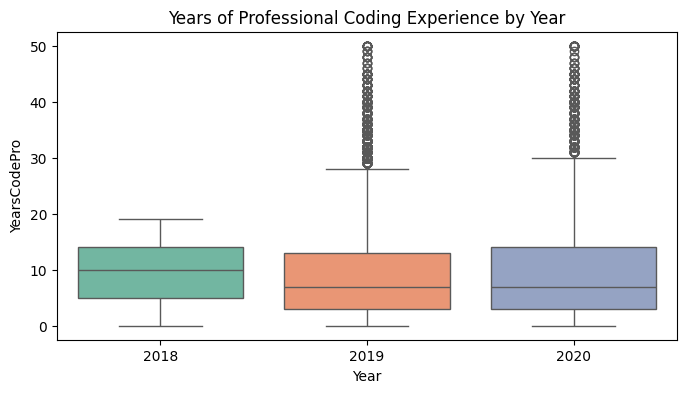

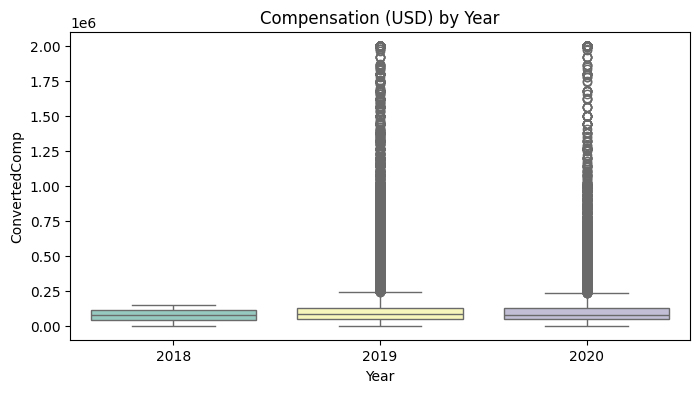

In [31]:
compFields = df[['Year','YearsCodePro','ConvertedComp']]

plt.figure(figsize=(8,4))
sns.boxplot(x="Year", y="YearsCodePro", data=compFields, palette="Set2")
plt.title('Years of Professional Coding Experience by Year')

plt.figure(figsize=(8,4))
sns.boxplot(x="Year", y="ConvertedComp", data=compFields, palette="Set3")
plt.title('Compensation (USD) by Year')

plt.show()

Although a few outliers are present in each column, the year-over-year distributions remain relatively consistent. This stability suggests a meaningful relationship between years of experience and compensation, supporting the hypothesis that experience translates into higher earnings.

Given the clear trend and correlation between these variables, Multiple Imputation is an appropriate method for addressing missing values. This approach leverages the observed relationships within the data to generate more robust and statistically reliable estimates than single imputation methods.

In [19]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

imputedf = df[['YearsCodePro','ConvertedComp']]

traindf, testdf = train_test_split(imputedf, train_size=0.1)

# Create the IterativeImputer model to predict missing values
imp = IterativeImputer(max_iter=20, random_state=0)

# Fit the model to the the test dataset
imp.fit(imputedf)

# Transform the model on the entire dataset
compdf = pd.DataFrame(np.round(imp.transform(imputedf),0), columns=['YearsCodePro','ConvertedComp'])

The above code iteratively performs multiple imputations (up to 20 iterations), estimating missing values in each column by leveraging the information contained in the other. By incorporating the observed relationship between the variables, the procedure generates plausible values that align with the overall structure and trend of the dataset.

With the missing data addressed, you can now examine the relationship between YearsCodePro and CinvertedComp using a boxplot to visualize how compensation varies across different levels of professional coding experience.

C:\Users\IsseI\AppData\Local\Temp\ipykernel_8752\1679263117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compPlotdf['CodeYearBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=5)


<Axes: xlabel='CodeYearBins', ylabel='ConvertedComp'>

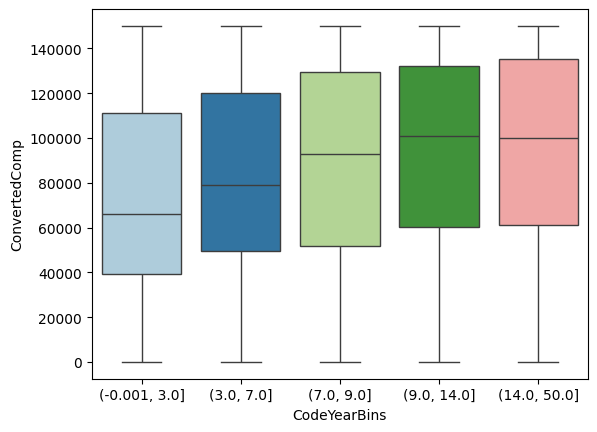

In [32]:
compPlotdf = compdf.loc[compdf['ConvertedComp'] <= 150000]
compPlotdf['CodeYearBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=5)

sns.boxplot(x="CodeYearBins", y="ConvertedComp",
            data=compPlotdf, palette="Paired")